Alexandra Gates

## Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import re
import os
import matplotlib.pyplot
from sklearn import svm
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import linear_model
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn import metrics
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble 
from sklearn import neighbors
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
import seaborn as sns
import functools
get_ipython().magic('matplotlib inline')
import pipeline

## Get Data

In [2]:
outcomes_df = pipeline.get_data('data/outcomes.csv', 'csv')
projects_df = pipeline.get_data('data/projects.csv', 'csv')

Combine the two dataframes on project_id.

In [3]:
df = pd.merge(projects_df, outcomes_df, on='projectid', how="inner")

### Predictor
Make the predictor, then identify columns to ignore that includes the predictor and create a dataframe without the predictor

In [4]:
predictor = 'fully_funded'
ignore_with_predictor = ['teacher_acctid', 'schoolid', 'school_ncesid', predictor]

Now identify columns to ignore for some functions without the final predictor and create the dataframe without those instead

In [5]:
#ignore_without_predictor = ['teacher_acctid', 'schoolid', 'school_ncesid']

## Datatypes, T/F, and NAs
### Find datatypes
commented out here so as not to take up space

In [6]:
datatypes = df.dtypes
#print(datatypes)

In [7]:
df['date_posted'] = pd.to_datetime(df['date_posted'])

### Change boolean columns to 1 or 0
only doing head so as not to take up too much space

In [8]:
df = pipeline.change_to_one_zero(df, 't', 'f')
df.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
0,62526d85d2a1818432d03d600969e99c,ebc7c90b6c92a069432e0714b8d93dfd,5aca9711ff0e4b37db48701f46f73036,1.713710e+11,41.972419,-88.174597,Bartlett,IL,60103,suburban,...,0.0,1,0.0,1,1.0,1.0,0.0,80.0,0.0,6.0
1,33d59ac771b80222ad63ef0f4ac47ade,de83b4c1f6428a15032c207c1d5e572a,d91a805b213bf74ae77b94e0de2b73ad,1.601530e+11,43.501154,-112.056780,Idaho Falls,ID,83402,urban,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1a3aaeffc56dd2a421e37d8298024c0a,f4c9ed095b85458dcf858e25f203af00,9310d3eb447a4e46bc5fc31ed007ceac,3.302610e+11,42.888244,-71.320224,Derry,NH,3038,suburban,...,0.0,0,1.0,0,0.0,0.0,0.0,NaN,0.0,2.0
3,33aa19ee4da4c5adf47d0dfb84fab5ef,17768031eb40de8d4497dbb54df48742,9ac70da58322783f82152eecc140a812,5.103240e+11,37.476158,-77.488397,Richmond,VA,23224,urban,...,0.0,0,1.0,0,0.0,0.0,0.0,NaN,0.0,1.0
4,e31c0ea8b68f404699dfb0d39e9bc99b,0f1bc5b4700fd33383be104442660178,cb9f688cf59e3ee22a087d616ca8f5d7,1.709930e+11,41.952851,-87.650233,Chicago,IL,60613,urban,...,0.0,1,1.0,0,0.0,1.0,0.0,50.0,0.0,2.0


### Find columns with NAs and handle them

In [9]:
are_there_nas = pipeline.find_nas(df)

Make a list of the columns that have NAs in them.

In [10]:
cols_with_nas = pipeline.cols_with_nas(are_there_nas)

## Create binary/dummy variables from categorical variable
Chose to do dummify columns that had less than 100 options to simplify issues

In [11]:
object_cols = list(df.select_dtypes(include=['object']).columns)

df = pipeline.dummify_categories(df, cols_with_nas, object_cols, ignore_with_predictor)

Find the cols with nas... again

In [12]:
are_there_nas2 = pipeline.find_nas(df)
cols_with_nas2 = pipeline.cols_with_nas(are_there_nas2)

Fill NAs! <br>
options for dataframes: cred_df_no_outliers, cred_df_less_outliers, cred_df <br>
options for stat: mean or medians

In [13]:
nas_filled = pipeline.fillnas_with_data(df, 'median', cols_with_nas2, object_cols)
nas_filled.head()

use only mean, median, or mode for stat
use only mean, median, or mode for stat
use only mean, median, or mode for stat
use only mean, median, or mode for stat
use only mean, median, or mode for stat
use only mean, median, or mode for stat
use only mean, median, or mode for stat
use only mean, median, or mode for stat


,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,grade_level_Grades 3-5,grade_level_Grades 6-8,grade_level_Grades 9-12,grade_level_Grades PreK-2
0,62526d85d2a1818432d03d600969e99c,ebc7c90b6c92a069432e0714b8d93dfd,5aca9711ff0e4b37db48701f46f73036,1.713710e+11,41.972419,-88.174597,Bartlett,IL,60103,suburban,...,0,1,0,0,0,0,1,0,0,0
1,33d59ac771b80222ad63ef0f4ac47ade,de83b4c1f6428a15032c207c1d5e572a,d91a805b213bf74ae77b94e0de2b73ad,1.601530e+11,43.501154,-112.056780,Idaho Falls,ID,83402,urban,...,0,0,1,0,0,0,1,0,0,0
2,1a3aaeffc56dd2a421e37d8298024c0a,f4c9ed095b85458dcf858e25f203af00,9310d3eb447a4e46bc5fc31ed007ceac,3.302610e+11,42.888244,-71.320224,Derry,NH,3038,suburban,...,0,0,0,1,0,0,0,1,0,0
3,33aa19ee4da4c5adf47d0dfb84fab5ef,17768031eb40de8d4497dbb54df48742,9ac70da58322783f82152eecc140a812,5.103240e+11,37.476158,-77.488397,Richmond,VA,23224,urban,...,0,1,0,0,0,0,0,0,0,1
4,e31c0ea8b68f404699dfb0d39e9bc99b,0f1bc5b4700fd33383be104442660178,cb9f688cf59e3ee22a087d616ca8f5d7,1.709930e+11,41.952851,-87.650233,Chicago,IL,60613,urban,...,0,0,1,0,0,0,0,1,0,0


Make sure all nas were filled

In [14]:
pipeline.find_nas(df)

projectid                                       False
teacher_acctid                                  False
schoolid                                        False
school_ncesid                                   False
school_latitude                                 False
school_longitude                                False
school_city                                     False
school_state                                    False
school_zip                                      False
school_metro                                     True
school_district                                  True
school_county                                   False
school_charter                                  False
school_magnet                                   False
school_year_round                               False
school_nlns                                     False
school_kipp                                     False
school_charter_ready_promise                    False
teacher_prefix              

## Find Correlations

Run correlations on each of the columns to see what's going on in the data with the final predictor. <br>
It's a little hard to read because of how many variables there are, but it's still helpful.

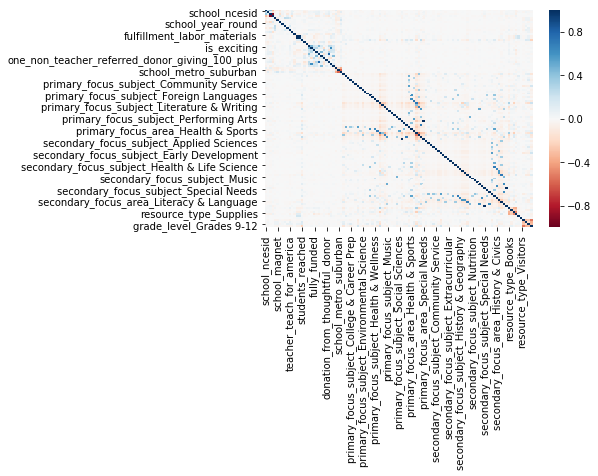

In [15]:
pipeline.get_correlations(df)

## make scatter plots
Commented this out because it takes too much time to run, but it helped me see correlations better.

In [16]:
# pipeline.make_scatter(cred_df)

## Outliers
Checked this and there were no rows with many (over 33% of the entires) outliers so removed to be clean.

## Features
from here on, a lot of this code is from our project.

Get feature lists using rf, lasso, ridge

In [17]:
exclude_types = ['object', 'datetime64[ns]']
rf_feature_list = pipeline.rf_features(df=df, var_excl=exclude_types, y_pred=predictor)
lasso_feature_list = pipeline.lcv_features(df=df, var_excl=exclude_types, y_pred=predictor)
ridge_feature_list = pipeline.rcv_features(df=df, var_excl=exclude_types, y_pred=predictor)

Analyze returned features

In [18]:
rf_feature_names = [x for (x,y) in rf_feature_list]
lasso_feature_names = [x for (x,y) in lasso_feature_list]
ridge_feature_names = [x for (x,y) in ridge_feature_list]
top_30 = rf_feature_names[:30]
print("TOP 30 RF: ", top_30)
print("LASSO NON-ZERO: ", lasso_feature_names)
print("RIDGE NON-ZERO: ", ridge_feature_names)
all_feat = list(set(rf_feature_names).intersection(rf_feature_names).intersection(lasso_feature_names))
print ("ALL THREE INTERSECTION: ", all_feat)

TOP 30 RF:  ['fully_funded', 'non_teacher_referred_count', 'great_messages_proportion', 'one_non_teacher_referred_donor_giving_100_plus', 'teacher_referred_count', 'three_or_more_non_teacher_referred_donors', 'is_exciting', 'total_price_including_optional_support', 'at_least_1_teacher_referred_donor', 'total_price_excluding_optional_support', 'at_least_1_green_donation', 'great_chat', 'school_latitude', 'school_longitude', 'school_zip', 'school_ncesid', 'resource_type_Technology', 'eligible_double_your_impact_match', 'students_reached', 'school_metro_urban', 'fulfillment_labor_materials', 'donation_from_thoughtful_donor', 'resource_type_Supplies', 'eligible_almost_home_match', 'grade_level_Grades 3-5', 'school_metro_rural', 'resource_type_Books', 'school_metro_suburban', 'primary_focus_subject_Environmental Science', 'grade_level_Grades PreK-2']
LASSO NON-ZERO:  []
RIDGE NON-ZERO:  []
ALL THREE INTERSECTION:  []


## Generate temoral tests

In [19]:
testing, training, times = pipeline.get_training_testing_datasets(df=df, 
                                                         time_col='date_posted', period='1M')

## Running all clfs

In [ ]:
FEATURES = top_30
Y_COLUMN = predictor

for i, test in enumerate(testing):
    time_eval = {}
    time_mod = {}
    train = training[i]
    m, e = pipeline.create_validate_clf(train_data=train, test_data=test, threshold=0.5, 
                        feature_list=FEATURES, y_column=Y_COLUMN)
    time_eval[str(times[i])] = {'evals' : e}
    time_mod[str(times[i])] = {'models' : m}

In [ ]:
time_eval